# Script 4 -  Supervised Classification

<div style="padding: 20px; border:4px solid green; font-size: 20px; text-align: center;">
  <img src="images/Script4_supervised_clustering_algorithm.png" alt="Data Transformation" style="max-width: 100%; height: auto;" />
</div>


<div style="padding: 30px; border:5px solid purple; font-size: 10px;">
  <span style="font-size: 15px;">
    <i>⚠️ The cell below is not mandatory to run: the required libraries are already installed in this notebook, and reinstalling them may take a long time.</i>
  </span><br/>
</div>


In [ ]:
install.packages("partykit")

# Librairies 

In [1]:
library(partykit)
library(vegan)
library(dendextend)
library(randomForest)

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: permute

Registered S3 method overwritten by 'dendextend':
  method     from 
  rev.hclust vegan


---------------------
Welcome to dendextend version 1.19.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:permute’:

    shuffle


The following object is masked from ‘package:stats’:

    cutree


randomForest 4.7-1

# Loading data

<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>

In [2]:
# load data -----
load("Doubs.RData")  

# 1 Classification trees (CT) -> *ctree()*

<div style="border: 5px solid purple; padding: 15px; border-radius: 0px;">
  <h1 style="color: purple; font-weight: bold; text-align: center;">1 Classification Tree</h1>
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
      <ul>
        <li>Used for <strong style="color: purple;">qualitative (categorical)</strong> response variables</li>
        <li>Use <strong>multiple explanatory variables</strong></li>
        <li>Apply <strong>binary logical conditions</strong> to split data into nodes</li>
      </ul>
    </div>
    <div style="flex: 1;">
      <img src="images/decision_tree.png" alt="Decision Tree" style="max-width: 70%;">
    </div>
  </div>
</div>


## 1.1 Building Classification Tree -> *ctree(response ~ predictors, data = `df`)*

- **response ~ predictors** → *Formula specifying the categorical response and explanatory variables (use **response ~ `.`** to use all predictors* )
- **predictors** : *explanatory variables* (`col1` + `col2` + `col3` +... )
- **df** → *Data frame containing the variables*

**Outputs** :

Each line means:

- **[Node number]**: *Unique ID of the node*.

- **Split condition**: *e.g., Petal.Length > 1.9*.

- **Prediction**: *What class/value is predicted at that node*.

- **n** = *Number of samples in this group*.

- **err** = *Misclassification error rate at this node (optional, for classification)*.

- **Number of inner nodes:** = *decision splits*

- **Number of terminal nodes:** = *final outcomes*

### 1.1.1 **Build a classification tree** to **predict Species** based on **four features** (*petal lenght*, *petal width*, *sepal length*, *sepal width*)  in the iris dataset

In [ ]:
library(partykit)

In [3]:
# Build a classification tree to predict Species based on all four features(petal lenght, petal width, sepal length, sepal width)  in the iris dataset
irisct <- ctree(Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width, data = iris)

# Display a textual summary of the tree structure and splits
irisct


Model formula:
Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

### 1.1.2 **Build a classification tree** to **predict Species** based on  **all features** in the iris dataset

In [4]:
# Build a classification tree to predict Species based on all  features in the iris dataset
irisct2 <- ctree(Species ~ .,data = iris)
# Display a textual summary of the tree structure and splits
irisct2


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 50, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7
|   |   |   [5] Petal.Length <= 4.8: versicolor (n = 46, err = 2.2%)
|   |   |   [6] Petal.Length > 4.8: versicolor (n = 8, err = 50.0%)
|   |   [7] Petal.Width > 1.7: virginica (n = 46, err = 2.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

## 1.2 Plotting Classification Tree → *plot(`ctree_object`, `inner_panel` = NULL)*

- **ctree_object** → *Classification tree object created by `ctree()`*  
- **inner_panel** → *Optional argument to customize node display:*  
  - `NULL` (default) shows split labels and predicted classes  
  - `node_barplot` shows barplots of class distributions in each node  


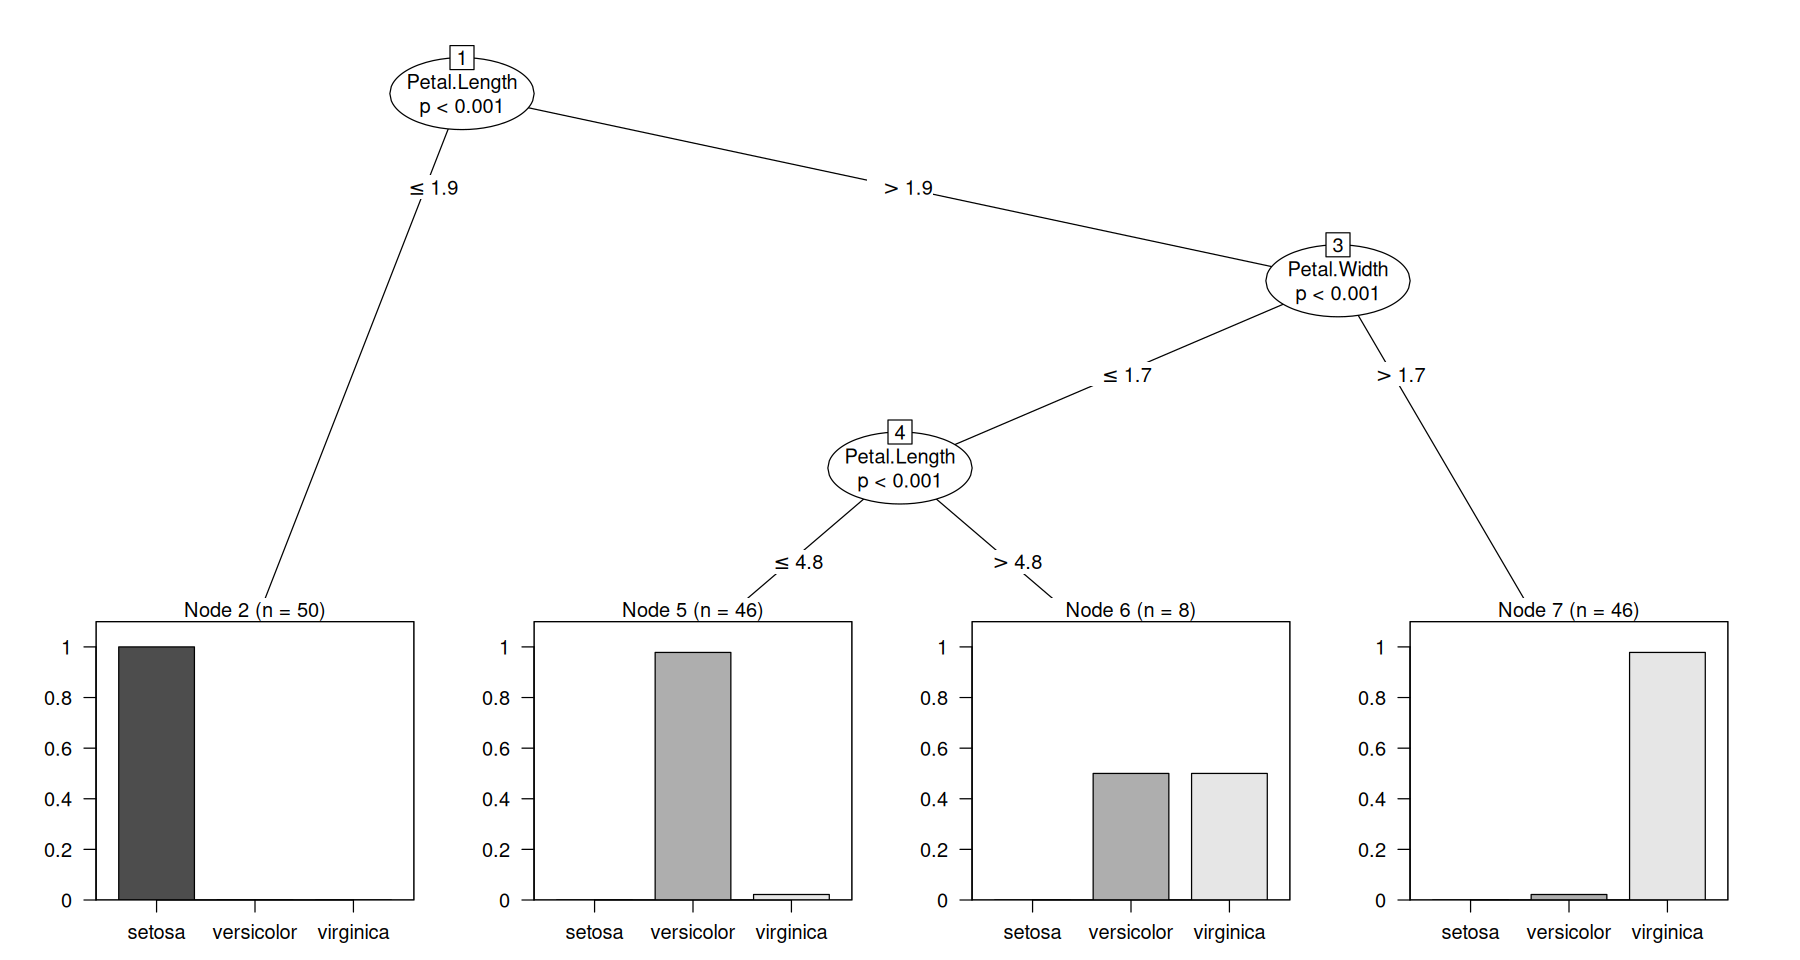

In [5]:
# Set plot size in Jupyter Notebook (15 x 8 inches)
options(repr.plot.width = 15, repr.plot.height = 8)

# Plot the classification tree for visual interpretation of "irisct"
plot(irisct)

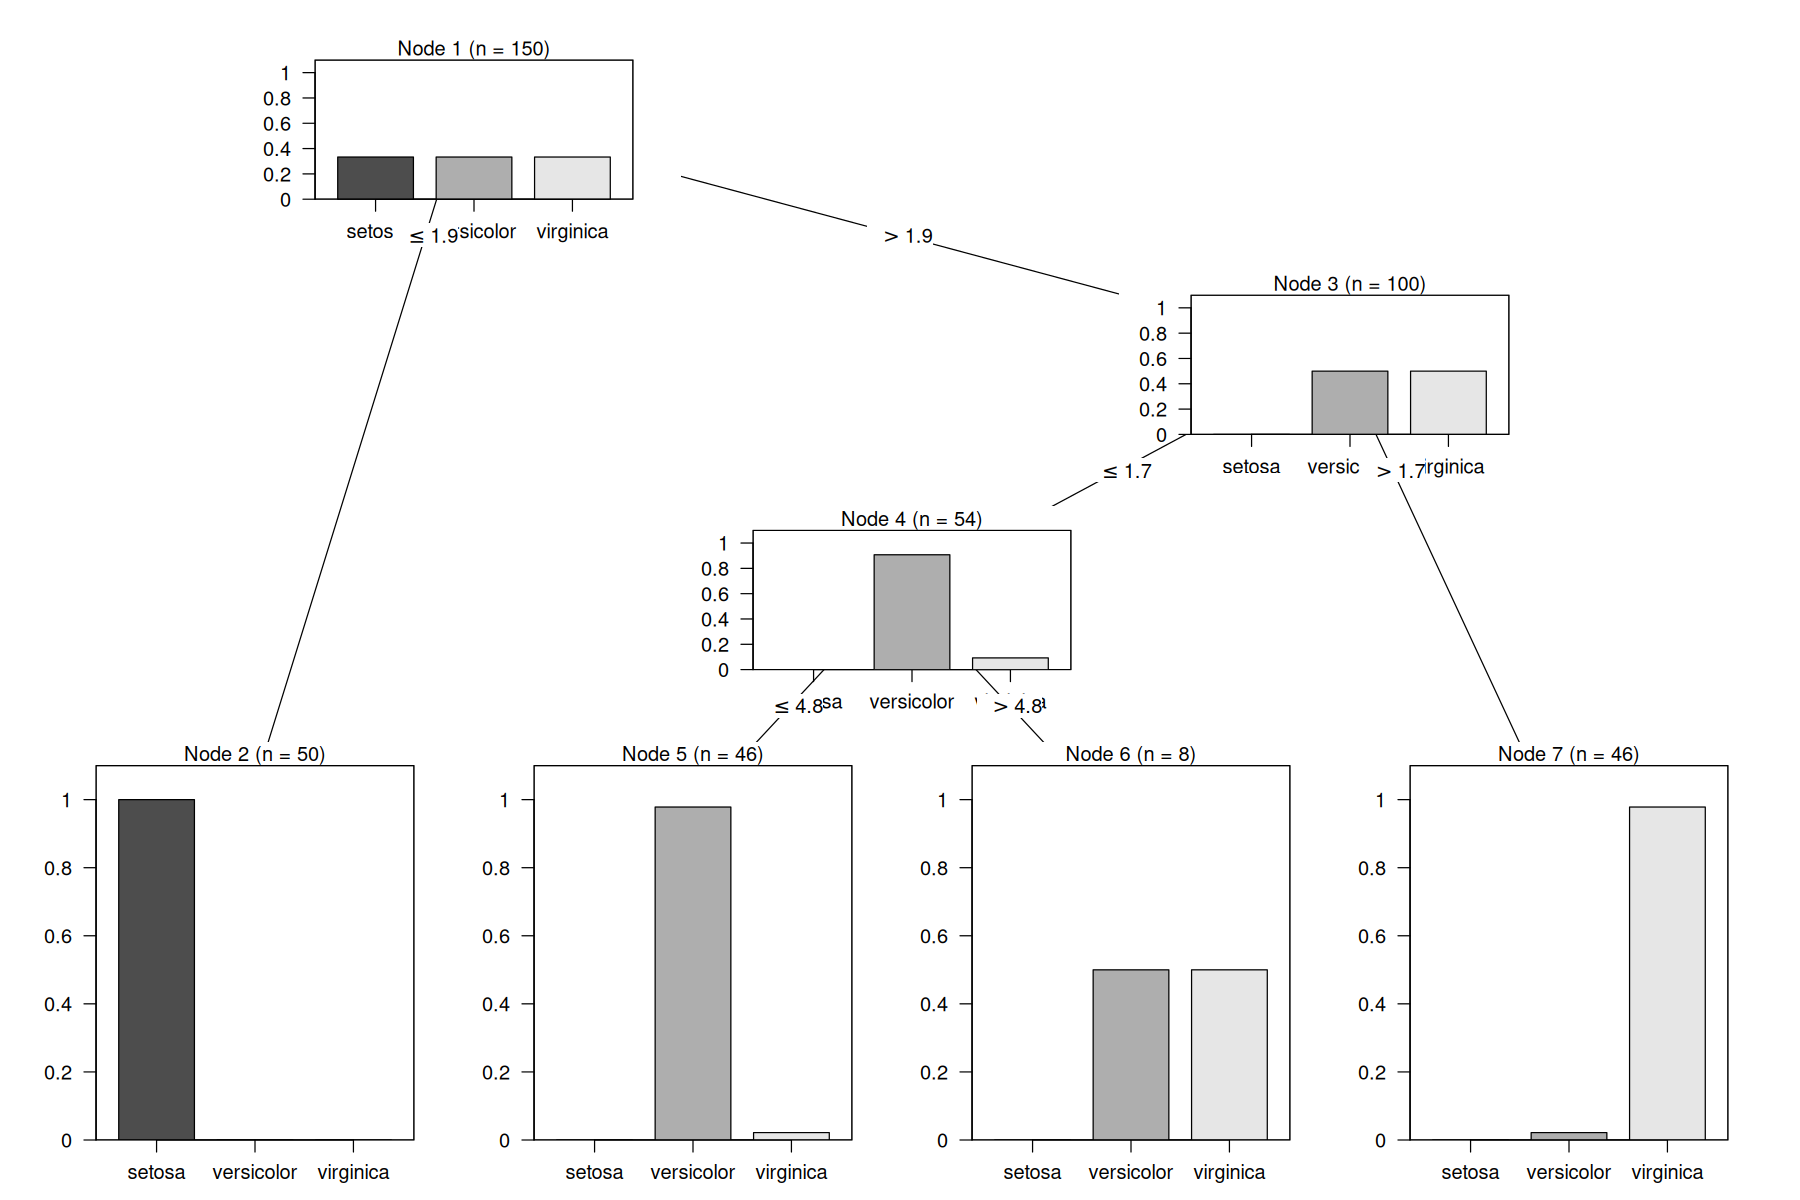

In [6]:
# Set plot size in Jupyter Notebook (15 x 10 inches)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plot the classification tree for visual interpretation of "irisct2"
# Use bar plots inside the nodes to show the class distribution
plot(irisct2, inner_panel = node_barplot)

# 2 Regression Trees (RT) -> *ctree()*

<div style="border: 5px solid orange; padding: 15px; border-radius: 0px;">
  <h1 style="color: orange; font-weight: bold; text-align: center;">2 Regression Tree</h1>
  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1; padding-right: 20px;">
      <ul>
        <li>Used for <strong style="color: orange;">quantitative (numerical)</strong> response variables</li>
        <li>Use <strong>multiple explanatory variables</strong></li>
        <li>Apply <strong>binary logical conditions</strong> to split data into nodes</li>
        <li>The response is a <strong>continuous variable</strong></li>
      </ul>
    </div>
    <div style="flex: 1;">
      <img src="images/Regression Tress.png" alt="Regression Tree" style="max-width: 60%;">
    </div>
  </div>
</div>


## 2.1 Building Regression Tree → *ctree(response ~ predictors, data = `df`)*

- **response ~ predictors** → *Formula specifying the **quantitative response** and explanatory variables (use **response ~ `.`** to use all predictors)*
- **predictors** : *explanatory variables* (`col1` + `col2` + `col3` + ... )
- **df** → *Data frame containing both the response and predictors*

In [7]:
# Build regression tree: Petal.Length as response
reg_tree <- ctree(Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, data = iris)

reg_tree


Model formula:
Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Width <= 0.6: 1.462 (n = 50, err = 1.5)
|   [3] Petal.Width > 0.6
|   |   [4] Sepal.Length <= 6.2
|   |   |   [5] Petal.Width <= 1.3
|   |   |   |   [6] Sepal.Length <= 5.5: 3.667 (n = 9, err = 1.5)
|   |   |   |   [7] Sepal.Length > 5.5: 4.081 (n = 16, err = 1.3)
|   |   |   [8] Petal.Width > 1.3
|   |   |   |   [9] Petal.Width <= 1.7: 4.623 (n = 13, err = 2.1)
|   |   |   |   [10] Petal.Width > 1.7: 5.000 (n = 11, err = 0.3)
|   |   [11] Sepal.Length > 6.2
|   |   |   [12] Sepal.Length <= 7
|   |   |   |   [13] Petal.Width <= 1.7: 4.667 (n = 15, err = 0.8)
|   |   |   |   [14] Petal.Width > 1.7: 5.483 (n = 24, err = 2.0)
|   |   |   [15] Sepal.Length > 7: 6.300 (n = 12, err = 1.4)

Number of inner nodes:    7
Number of terminal nodes: 8

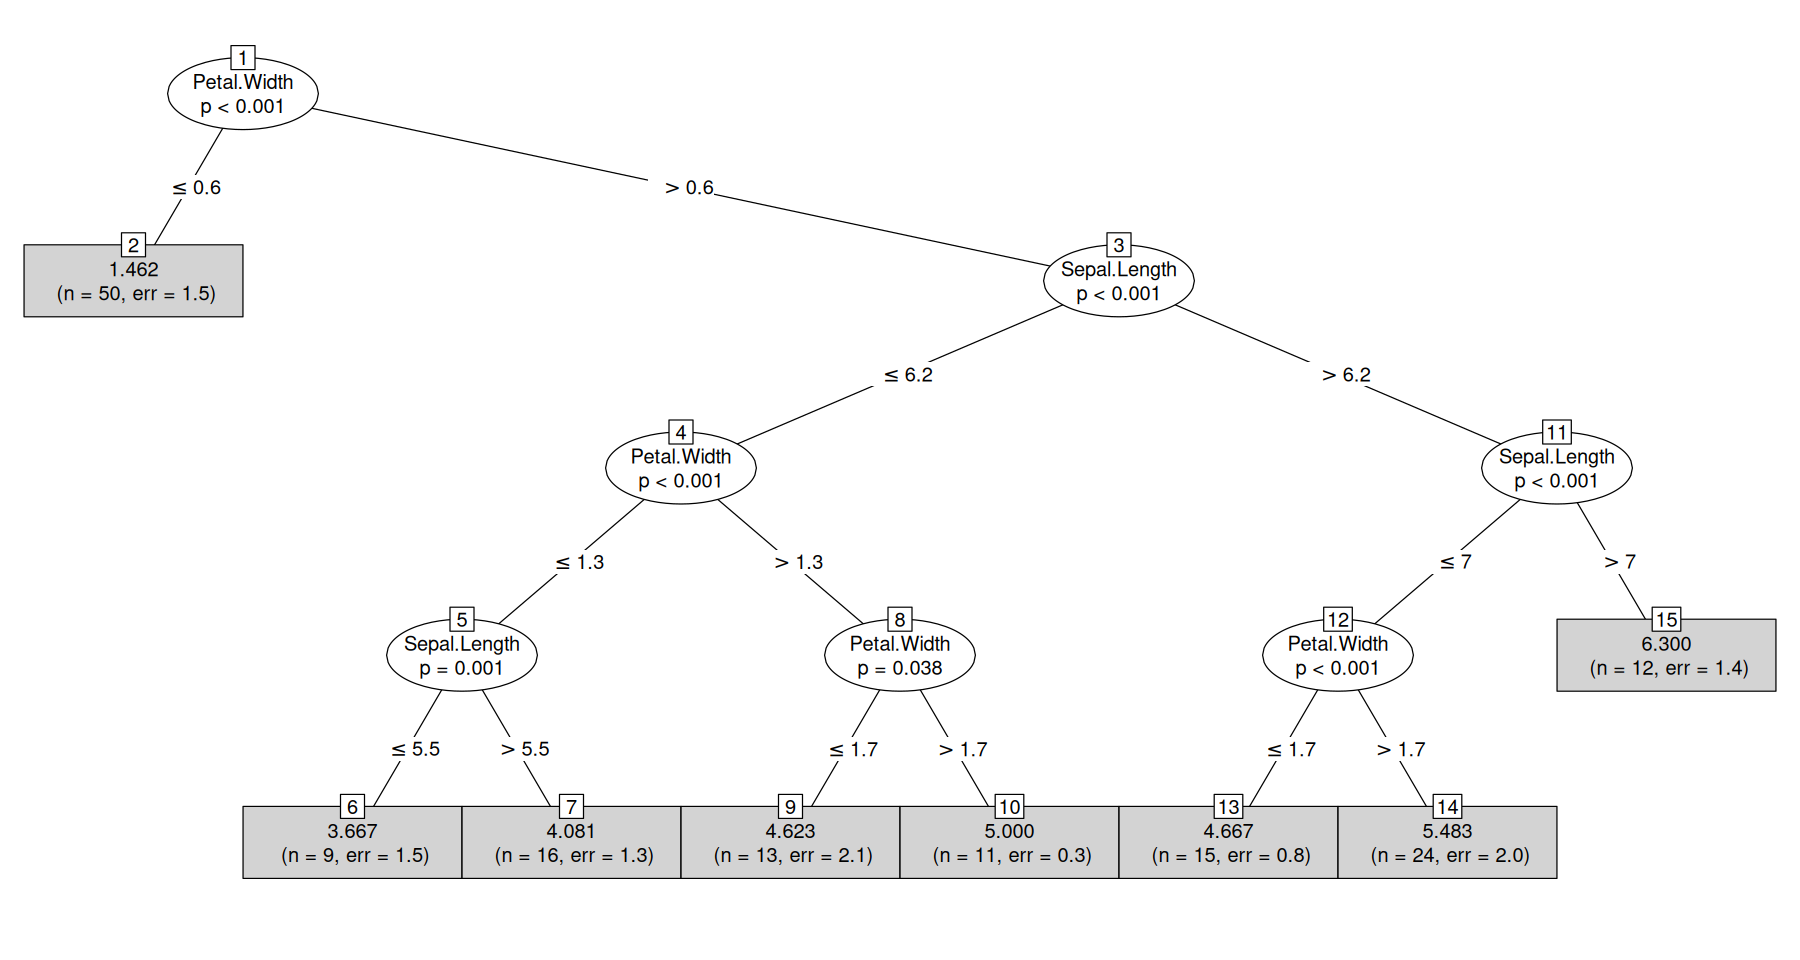

In [8]:
# Set plot size in Jupyter Notebook (15 x 8 inches)
options(repr.plot.width = 15, repr.plot.height = 8)
# Plot the regression tree
plot(reg_tree,type="simple")

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 1</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have correct format).<br/><br/>

  2) Each row in the dataset represents an individual, with columns indicating characteristics such as `married`, `has_a_job`, `has_children`, etc. <br/>Use a decision tree model to predict whether a person has a car (`has_car` column) based on the following predictor variables: `owns_house`, `has_a_job`, `married`, and     `has_children`.

  3) Plot the decision tree<br/><br/>
</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>


In [ ]:
# 2) Use a decision tree model to predict whether a person has a car (has_car column) 
#based on the following predictor variables: owns_house, has_a_job, married, and has_children.

demographic_data_ct <- ____(____ ~ owns_house + has_job + married + has_children, data = ___) #fill the blanks
demographic_data_ct


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_ct <- <span style="color:blue;">ctree</span>(<span style="color:blue;">has_car</span> ~ owns_house + has_job + married + has_children, data = <span style="color:blue;">demographic_data</span>) </code><br/>
  </div>
</details>


In [ ]:
# 3) plot the decision tree

___(demographic_data_ct)

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code><span style="color:blue;">plot</span>(demographic_data_ct)</code><br/>
    <img src="images/Script4_Q2.png" alt="Script4_Q2" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 3 Confusion/Error Matrix -> *table(predict(`ctree_object`),`df$col`)*

<div style="border: 5px solid blue; padding: 15px;">
  <h1 style="color: black; font-weight: bold; text-align: center;">3 Confusion Matrix</h1>
  <div style="display: flex; align-items: center; justify-content: space-between;">
    <div style="width: 70%;">
      <p><strong>The confusion matrix</strong> is a tool used to evaluate the performance of a classification model. It compares the predicted labels with the actual labels and helps identify the types of errors made by the model. It includes four main components:</p>
      <ul>
        <li><strong>True Positives (TP)</strong>: cases that are actually positive and correctly predicted as positive.</li>
        <li><strong>True Negatives (TN)</strong>: cases that are actually negative and correctly predicted as negative.</li>
        <li><strong>False Positives (FP)</strong>: cases that are actually negative but incorrectly predicted as positive.</li>
        <li><strong>False Negatives (FN)</strong>: cases that are actually positive but incorrectly predicted as negative.</li>
      </ul>
      <p>These components are used to calculate evaluation metrics such as <strong>accuracy</strong>, <strong>precision</strong>, <strong>recall</strong>, and <strong>F1-score</strong>.</p>
    </div>

<div style="width: 55%; margin-left: 20px;">
      <img src="images/Confusion Matrix.png" alt="Confusion Matrix" style="width: 100%;">
    </div>
  </div>
</div>


## 3.1 Confusion Matrix  -> *table(predict(`ctree_object`),`df$col`)*

`table(predict(model), df$col)`

- create a **confusion matrix**, which compares the predictions made by a classification model to the actual class labs.

**Components**:
- `model`: a trained classification model (e.g., decision tree, SVM).
- `predict(model)`: generates the predicted class labels from the model.
- `df$col`: the actual (true) class labels from the dataset we want to predict
- `table(...)`: creates a cross-tabulation (confusion matrix) counting how often each prediction matches or differs from the true class.

**Result**:
The output is a **confusion matrix** where:
- **Rows** = predicted classes  
- **Columns** = actual classes  
- Each cell `[i, j]` = number of observations predicted as class *i* but actually belonging to class *j*.

### 3.1.1 Example with the classification tree of the Iris Species

<div style="display: flex; align-items: center; justify-content: space-between;border: 5px solid blue;padding: 15px; ">
    <img src="images/Error Matrix.png" width="55%">
</div>

In [ ]:
# confusion matrix
table(predict(irisct), iris$Species)

In [ ]:
# confusion matrix
table(predict(irisct2), iris$Species)

<div style="padding: 10px; border:4px solid red; font-size: 18px; position: relative;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>

  <div style="display: flex; align-items: flex-start;">
    <div style="flex: 1;">
        Here is an example of a confusion matrix derived from a decision tree to predict fishes species. <br/><br/><br/><br/>
        <strong>Which statements are correct? </strong>
    </div>
    <div style="margin-left: 20px;">
      <img src="images/Script4_Q1.png" alt="Skewed distribution" style="max-width: 500px; height: auto; border: 1px solid #ccc;" />
    </div>
  </div>

<form>
  <label><input type="radio" name="q5" value="1"> 1) The decision tree perfectly predicted species 2 and never made a mistake when identifying it.</label><br/>
  <label><input type="radio" name="q5" value="2"> 2) There was one instance where the true class was species 1, but the decision tree labeled it as species 3.</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The decision tree correctly classified all samples that truly belonged to species 3.</label><br/>
</form>


</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">

<form>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 1) The decision tree perfectly predicted species 2 and never made a mistake when identifying it.</label><br/>
  <label style="color: blue;"><input type="radio" name="q5" value="squaring"> 2) There was one instance where the true class was species 1, but the decision tree labeled it as species 3.</label><br/>
  <label><input type="radio" name="q5" value="3"> 3) The decision tree correctly classified all samples that truly belonged to species 3.</label><br/>
</form>

  </div>
</details>


# 4. Predict Outputs Using a Classification Tree -> *predict(`ctree_object`, newdata=`new_sample`)*

**Create a new data frame with feature values for the new sample**

- **new_sample** <- data.frame(
  *Feature1 = value1*,
  *Feature2 = value2*,
  *Feature3 = value3*,
  *Feature4 = value4*
)

**Predict the class using the trained model**

- **prediction** <- predict(model, newdata = new_sample)


<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
  <h1 style="color: black; font-weight: bold; text-align: center;"> 4 Predicting Outputs Using a Classification Tree</h1>
  <div style="display: flex; justify-content: space-around;">
    <img src="images/newiris1.png" alt="Image 1" style="width: 45%;">
    <img src="images/newiris2.png" alt="Image 2" style="width: 45%;">
  </div>
</div>


## 4.1 Predict iris species with previous classification tree

In [ ]:
#predict for new iris specimen:
new.iris1<-data.frame(Sepal.Length=4.7,Sepal.Width=3.4,Petal.Length=1.8,Petal.Width=0.2)
predict(irisct, newdata=new.iris1)

new.iris2<-data.frame(Sepal.Length=5.7,Sepal.Width=2.6,Petal.Length=4.1,Petal.Width=1.3)
predict(irisct, newdata=new.iris2)

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 3</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have the correct format).<br/>

  2) Use a decision tree model to predict whether a person has a car (`has_car` column) based on the following predictor variables: `owns_house`, `has_a_job`, `married`, and     `has_children`.

  3) Create a new sample called "John", John is supposed to : <br/>
    <ul>
      <li>Own a house</li>
      <li>Have a job</li>
      <li>Not be married</li>
      <li>Have no children</li>
    </ul>
    <br/>
4) Predict if John has a car or not
</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>

In [ ]:
# 2) Use a decision tree model to predict whether a person has a car (has_car column) 
#based on the following predictor variables: owns_house, has_a_job, married, and has_children.

demographic_data_ct <- ____(____ ~ owns_house + has_job + married + has_children, data = ___) #fill the blanks
demographic_data_ct


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_ct <- <span style="color:blue;">ctree</span>(<span style="color:blue;">has_car</span> ~ owns_house + has_job + married + has_children, data = <span style="color:blue;">demographic_data</span>) </code><br/>
  </div>
</details>


In [ ]:
# 3) Create a new sample called "John"
        #Own a house
        #Have a job
        #Not be married
        #Have no children

John<-data.frame(owns_house="___",has_job="___",married="___",has_children="___")
John


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> John<-data.frame(owns_house= <span style="color:blue;">"Yes"</span>,has_job= <span style="color:blue;">"Yes"</span>, married = <span style="color:blue;">"No"</span>, has_children = <span style="color:blue;">"No"</span>) </code><br/>
        <img src="images/Script4_Q3.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>


In [ ]:
# 4) Predict if John has a car or not
predict(______, newdata=___)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> predict(<span style="color:blue;">demographic_data_ct</span>,newdata = <span style="color:blue;">John</span>)</code><br/>
        <img src="images/Script4_Q3_1.png" alt="Script4_Q3_1" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 5. Random Forest -> *randomforest()*

<div style="border: 5px solid darkgreen; padding: 15px; border-radius: 0px;">
  <h1 style="color: green; font-weight: bold; text-align: center;">5 Random Forest</h1>
  <div style="text-align: center;">
    <img src="images/Script4_RandomForest.png" alt="Random Forest" style="max-width: 100%;">
  </div>
</div>


## 5.1 Building a Random Forest -> *randomForest(response ~ predictors, data = `df`, ntree =, mtry =, importance = `TRUE`, na.action = `na.omit`, do.trace = , proximity = `T`)*

- **response ~ predictors** → *Formula specifying the target (response) variable and the explanatory (predictor) variables*  
  *(use `response ~ .` to include all predictors in the dataset)*  
- **df** → *Data frame containing both the response and predictor variables*
- **ntree** → *Number of trees to grow (e.g., 500)*
- **mtry** → *Number of variables randomly sampled at each split*
- **importance = TRUE** → *Computes variable importance*
- **proximity = T** → *Computes proximity matrix*
- **na.action = na.omit** → *Excludes rows with missing values*

**Ouputs** :

- **Type of random forest**: *classification*
- **Number of trees (`ntree`)**: *ntree*
- **Number of variables tired at each split** : *mtry*
- **Out-of-bag (OOB) error estimate**: *OOB estimated*
- **confusion matrix**


In [ ]:
# Build a Random Forest to predict Species based on all four features (petal length, petal width, sepal length, sepal width)

iris_rf <- randomForest(Species ~ Petal.Length + Petal.Width + Sepal.Length + Sepal.Width,
                        data = iris,
                        ntree = 500,          # Number of trees
                        mtry = 2,             # Number of variables tried at each split
                        importance = TRUE,    # Compute variable importance
                        proximity = TRUE)     # Compute proximity matrix

# Display a summary of the Random Forest model
print(iris_rf)

## 5.2 Plotting Random Forest performances -> *plot(`rf`)*
- On **x-axis** : *number of trees*

- On **y-axis** : *error rates*

- **Black curve** : *overall out-of-bag (OOB)* error rate.

- **Colored curves** : *error rates for each individual class* (species).

In [ ]:
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)

# Plot the model's error rate over number of trees
plot(iris_rf)

## 5.3 Display variable importance -> *importance(rf)*

- **Rows** : *Each row corresponds to one predictor variable used in the Random Forest model* 
- **First Columns** : *Importance scores of the variable specifically for predicting each species class.*
- **`MeanDecreaseAccuracy/%IncMSE`** : *Overall decrease in model accuracy if that variable is permuted (i.e., randomly shuffled). A higher value means the variable has a larger impact on prediction accuracy.*
- **`MeanDecreaseGini/IncNodePurity`** : *Total decrease in node impurity (Gini index) contributed by splits on that variable across all trees. Higher values indicate the variable contributes more to creating pure (homogeneous) nodes*

In [ ]:
# Display variable importance
importance(iris_rf)

## 5.4 plot variable importance -> *varImpPlot(rf)*

- **MeanDecreaseAccuracy Plot** : *Shows the Mean Decrease Accuracy (on x-axis) for each variable*
- **MeanDecreaseGini Plot** : *Shows the Mean Decrease Gini index (on x-axis) for each variable*

In [ ]:
# Set plot size in Jupyter Notebook (10 x 7 inches)
options(repr.plot.width = 10, repr.plot.height = 7)
# Optional: Plot variable importance
varImpPlot(iris_rf)

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/><br/>

  1) Load the <code>demographic_data.csv</code> file and store it in a variable named <code>demographic_data</code> (use `stringsAsFactors = TRUE` to be sure to have correct format).<br/><br/>

  2) Use a random forest model to predict whether a person lives in town (`live_in_town` column) based on all other variables and shows the output. Use 500 trees, and 2  variables randomly sampled at each split, let  <code> importance = TRUE </code> and <code>proximity = TRUE</code> and show the result

3) Which variable is the more important according to the <strong>MeanDecreaseAccuracy</strong>

</div>

In [ ]:
# 1) Read the CSV file into a dataframe named demographic_data (hint: use read.csv())
demographic_data <- ____("demographic_data.csv", stringsAsFactors = TRUE)



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data <- <span style="color:blue;">read.csv</span>("demographic_data.csv", stringsAsFactors = TRUE) </code><br/>
  </div>
</details>

In [ ]:
#2) Use a random forest model to predict whether a person lives in town (live_in_town column) based on all other variables

# Use 500 trees,
# 2 variables randomly sampled at each split

demographic_data_rf <- ___(___ ~ ___, # hint (use randomForest, live_in_town and when using all variable as predictors juste use "~.")
                        data = ___,      # hint (use demographic_data )
                        ntree = ___,                  # Number of trees # hint (use 500 trees)
                        mtry = ___,                     # Number of variables tried at each split (use 2 varaibles randomly sampled at each split)
                        importance = ___,            # Compute variable importance 
                        proximity = ___)             # Compute proximity matrix


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> demographic_data_rf <- <span style="color:blue;">randomForest</span>(<span style="color:blue;">live_in_town</span> ~ <span style="color:blue;">.</span>, 
        data = <span style="color:blue;">demographic_data</span>,
        ntree = <span style="color:blue;">500</span>,
        mtry = <span style="color:blue;">2</span>,
        importance = <span style="color:blue;">TRUE</span>,
        proximity = <span style="color:blue;">TRUE</span>
    </code><br/>
  </div>
</details>


In [ ]:
# 3) Which variable is the more important according to the MeanDecreaseAccuracy to predict if a person lives in town ?
______(demographic_data_rf)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">importance</span>(demographic_data_rf) </code><br/>
      <img src="images/Script4Q4.png" alt="Script4_Q" style="max-width:40%; margin-top:10px;">
  </div>
</details>

# 6. Partial Dependance Plots -> *partialPlot()*

## 6.1 Partial Dependence Plots → *partialPlot(model, data, variable)*

- **model** → *A trained random forest model object*  
- **data** → *Data frame used to train the model*  
- **variable** → *Name of the predictor variable for which to plot the partial dependence*  

**Outputs** :

- **X-axis** : Values of the selected predictor variable (the variable specified in the `variable` argument).  
- **Y-axis** : Estimated partial dependence — the average predicted response of the model when the predictor variable takes those values, marginalizing over the other variables.

In [ ]:
# Set plot size in Jupyter Notebook (14 x 10 inches)
options(repr.plot.width = 14, repr.plot.height = 10)

# Partial dependence plots for selected predictors
par(mfrow = c(2, 2))  # Arrange plots in 2 rows x 2 cols

partialPlot(iris_rf, iris, Petal.Length, main = "Partial Dependence on Petal.Length")
partialPlot(iris_rf, iris, Petal.Width, main = "Partial Dependence on Petal.Width")
partialPlot(iris_rf, iris, Sepal.Length, main = "Partial Dependence on Sepal.Length")
partialPlot(iris_rf, iris, Sepal.Width, main = "Partial Dependence on Sepal.Width")

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">Question 4</span><br/><br/>

  1) Load the <code>stress_dataset.csv</code> file and store it in a variable named <code>stress_dataset</code>, This dataset captures real-life vibes from students—their nightly sleep hours, daily coffee intake, average grades, days left before exams, and their level of stress ! <br/><br/>

  2) Use a random forest model to predict the level of stress of a student (`stress_level` column on scale of [0-10]) based on all other variables and shows the output. Use 500 trees, and 2  variables randomly sampled at each split, let  <code> importance = TRUE </code> and <code>proximity = TRUE</code> and show the result

3) Which variable is the more important according to the <strong>MeanDecreaseAccuracy</strong>

4) Show the variables importance using `varImpPlot()`

5) Generate and display the partial dependence plot for the predicted `stress_level` to visualize the effect of the most important variable on stress.

</div>

In [ ]:
# 1) Read the CSV file into a dataframe named stress_dataset (hint: use read.csv())
stress_dataset<- ___("stress_dataset.csv")


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> stress_dataset <- <span style="color:blue;">read.csv</span>("stress_dataset.csv") </code><br/>
  </div>
</details>

In [ ]:
#2) Use a random forest model to predict the level of stress of a student( (stress_level column) based on all other variables

# Use 500 trees,
# 2 variables randomly sampled at each split

stress_dataset_rf <- ___(___ ~ ___, # hint (use randomForest, live_in_town and when using all variable as predictors juste use "~.")
                        data = ___,      # hint (use demographic_data )
                        ntree = ___,                  # Number of trees # hint (use 500 trees)
                        mtry = ___,                     # Number of variables tried at each split (use 2 varaibles randomly sampled at each split)
                        importance = ___,            # Compute variable importance 
                        proximity = ___)             # Compute proximity matrix


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> stress_dataset_rf <- <span style="color:blue;">randomForest</span>(<span style="color:blue;">stress_level</span> ~ <span style="color:blue;">.</span>, 
        data = <span style="color:blue;">stress_dataset</span>,
        ntree = <span style="color:blue;">500</span>,
        mtry = <span style="color:blue;">2</span>,
        importance = <span style="color:blue;">TRUE</span>,
        proximity = <span style="color:blue;">TRUE</span>
    </code><br/>
  </div>
</details>


In [ ]:
# 3) Which variable is the more important according to the MeanDecreaseAccuracy to predict the stress level of a student ?
___(stress_dataset_rf)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">importance</span>(stress_dataset_rf) </code><br/>
      <img src="images/Script4_Q5.png" alt="Script4_Q" style="max-width:25%; margin-top:10px;">
  </div>
</details>

In [ ]:
# 4) Show the variables importance using varImpPlot()
___(stress_dataset_rf)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">varImpPlot</span>(stress_dataset_rf) </code><br/>
      <img src="images/Script4_Q5_2.png" alt="Script4_Q" style="max-width:45%; margin-top:10px;">
  </div>
</details>

In [ ]:
# 5) Generate and display the partial dependence plot for the predicted stress_level 
     #to visualize the effect of the most important variable on stress

# Get all column names, then remove the target variable "stress_level"
predictors <- names(stress_dataset)
predictors <- predictors[predictors != "stress_level"]

# Set the plotting layout: 4 rows and 3 columns
par(mfrow = c(4, 3))  # 4x3 grid 

# Set plot size in Jupyter Notebook (20 x 14 inches)
options(repr.plot.width = 20, repr.plot.height = 14)

# Define a vector of colors to use
colors <- c("darkred", "steelblue", "forestgreen", "purple", "orange", "gold", "deeppink", "cyan", "brown")
#initialize i for the colour attribution in the loop
i <- 0

# Loop through each predictor and generate its Partial Dependence Plot (PDP)
for (predictor in predictors) {
    
    #increment i for the colour attribution
   i = i+ 1
    
  ___(___, # hint : use the partial plot function and the random forest model
              ___,  # hint : use the corresponding dataset
              as.character(___),  # hint use predictor
              main = paste("Effect of", as.character(predictor)),
              xlab = as.character(predictor),
              ylab = "Predicted Stress Level",
             col = colors[i])
}


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> <span style="color:blue;">partialPlot</span>(<span style="color:blue;">stress_dataset_rf</span>, 
        <span style="color:blue;">stress_dataset</span>,
        as.character(<span style="color:blue;">predictor</span>),
        main = paste("Effect of", as.character(predictor)),
        xlab = as.character(predictor),
        ylab = "Predicted Stress Level",
        col = colors[i])
    </code><br/>
      <img src="images/Script4_Q5_1.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>


# 7. Cut dendrograms to form clusters -> *cutree()*

**Cut the hierarchical clustering tree into k clusters**

**use the following structure** 
```r
clustered_tree <- cutree( hc_object, k = number_of_clusters) # Cut the dendrogram object into the desired number of clusters
```
- **clustered_tree** : *tree separeted in k clusters*
- **hc_object** = *hierarchical clustering object* (result of as.dendogram(hc))
- **number_of_clusters** = *Number of clusters to cut the dendrogram into*

# 8. Coloring a dendogram according to cluster 

**use the following structure**
```r
colors_to_use <- clustered_tree  # Copy the dendrogram structure (or placeholder for colors)

colors_to_use <- colors_to_use[order.dendrogram(hc_object)]  # Reorder colors based on dendrogram order

labels_colors(hc_object) <- colors_to_use  # Assign the colors to the dendrogram labels

plot(hc_object)  # Plot the colored dendrogram


```
- **hc_object** : *hierarchical clustering object (result of as.dendogram(hc))*
- **clusters_tree** : *tree separeted in k clusters*
- **colors_to_use** : *colours for each cluster among the tree*
-  **plot(hc_object)** : *plot the decision tree with colours for each cluster*

# HOMEWORK : TASK 1 

<div style="padding: 12px; border: 2px solid red; font-size: 18px;">
  <span style="text-decoration: underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 1</span><br/>

  1) Remove empty sites from the <code>spe</code>, <code>env</code>, <code>spa</code>, and <code>latlong</code> datasets.<br/>
  
  2) Compute the chord distance matrix between sites using the <code>spe</code> dataset.<br/>
  
  3) Perform hierarchical agglomerative clustering using Ward’s minimum variance method.<br/>
  
  4) Convert the resulting object into a dendrogram using <code>as.dendrogram()</code> and plot it.<br/>
  
  5) Partition the dendrogram into 4 clusters using <code>cutree()</code>.<br/>
  
  6) Plot the dendrogram with specific colors for each cluster.<br/>
  
  7) Create a scatter plot of the sample locations with colors matching the dendrogram clusters.<br/>
  
  8) <em>[Instruction missing – consider completing this step]</em>
</div>


In [ ]:
# 1) Remove empty site 8 (you don't have to change anything here)
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]
latlong <- latlong[-8, ]

In [ ]:
# 2)Compute the chord distance matrix between sites using the spe dataset.

# 1. Normalize the data
spe.norm <- decostand(_____, "_____")  # Hint: input data, method = "normalize"

# 2. Calculate the distance matrix
spe.ch <- vegdist(_____, "_____")      # Hint: normalized data, distance method = "euc"


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">2) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.norm <- decostand(<span style="color:blue;">spe</span>,"<span style="color:blue;">normalize</span>") </code><br/>
      <code> spe.ch <- vegdist(<span style="color:blue;">spe.norm</span>,"<span style="color:blue;">euc</span>") </code><br/>
  </div>
</details>

In [ ]:
#3) Perform hierarchical agglomerative clustering using Ward’s minimum variance method.

# 1. Perform hierarchical clustering
hc <- hclust(_____, method = "_____")  # Hint: distance matrix, clustering method = "ward.D2"


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">3) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> hc <- hclust(<span style="color:blue;">spe.ch</span>,"<span style="color:blue;">ward.D2</span>") </code><br/>
  </div>
</details>

In [ ]:
#4). Convert the hierarchical object into a dendrogram object
spe.cw <- as.dendrogram(_____)         # Hint: object returned by hclust

# 3. Plot the dendrogram
plot(___)                         

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">4) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.cw <- as.dendrogram(<span style="color:blue;">hc</span>) </code><br/>
    <code> plot(<span style="color:blue;">spe.cw</span>) </code><br/>
        <img src="images/Script4_HomeWork1.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>


In [ ]:
#5) Partition the dendrogram into 4 groups
spe.cw.g <- cutree(_____, _____)  # Hint: dendrogram object, number of clusters


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">5) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> spe.cw.g <- cutree(<span style="color:blue;">spe.cw</span>,<span style="color:blue;">4</span>) </code>
  </div>
</details>

For 6) 

**use the following structure**
```r
colors_to_use <- clustered_tree  # Copy the dendrogram structure (or placeholder for colors)

colors_to_use <- colors_to_use[order.dendrogram(hc_object)]  # Reorder colors based on dendrogram order

labels_colors(hc_object) <- colors_to_use  # Assign the colors to the dendrogram labels

plot(hc_object)  # Plot the colored dendrogram

```
- **hc_object** : *hierarchical clustering object (result of as.dendogram(hc))*
- **clusters_tree** : *tree separeted in k clusters*
- **colors_to_use** : *colours for each cluster among the tree*
-  **plot(hc_object)** : *plot the decision tree with colours for each cluster*
```

In [ ]:
#6) Plot the dendrogram with specific colors for each cluster.

colors_to_use <- ___      #define colors and sort according to tips in dendrogram

colors_to_use<-colors_to_use[order.dendrogram(___)] # Reorder colors based on dendrogram order

labels_colors(___) <- colors_to_use   # Assign the colors to the dendrogram labels

plot(___) # Plot the colored dendrogram


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">6) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> colors_to_use <- <span style="color:blue;">spe.cw.g</span> </code> <br>
     <code> colors_to_use <- colors_to_use[order.dendrogram(<span style="color:blue;">spe.cw</span>)] </code> <br>
       <code> labels_colors(<span style="color:blue;">spe.cw</span>) <- colors_to_use </code> <br>
       <code> plot(<span style="color:blue;">spe.cw</span>)</code> <br>  
        <img src="images/Script4_HomeWork1_1.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>

In [ ]:
#7) Create a scatter plot of the sample locations with colors matching the dendrogram clusters.

# Before computing the scatter plot, we need to merge all relevant data:
# - the dendrogram cluster assignments (i.e., cluster each sample belongs to)
# - the environmental data describing each sample (e.g., temperature, ammonium, nitrate concentrations)
# - the spatial coordinates of each sample (X and Y)

all.dat<-cbind(spe.cw.g,env,spe, spa)
head(all.dat)

In [ ]:
#7) Create a scatter plot of the sample locations with colors matching the dendrogram clusters.

# Plot the spatial distribution of sample groups using X and Y coordinates

# Hint: since 'spa' is a data frame containing only the X and Y coordinates, 
# you can directly use 'spa' without specifying columns
____(___, 
     type = "l", 
     col = "lightblue",
     lwd = 3,
     xlab = "X coordinate", 
     ylab = "Y coordinate",
     main = "Spatial Distribution of Sample Groups")




# Plot the points colored by the dendrogram clusters
# Hint: use the 'points()' function to add sample points to an existing plot,
# and make sure the 'col' argument matches the dendrogram cluster assignments (e.g., 'spe.cw.g')
______(all.dat$X,
       all.dat$Y
       ,pch=16, 
       cex=2.5,
       col=all.dat$___)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">7) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> plot (<span style="color:blue;">spa</span>,
                         type = "l", 
                         col = "lightblue",
                         lwd = 3,
                         xlab = "X coordinate", 
                         ylab = "Y coordinate",
                         main = "Spatial Distribution of Sample Groups")</code> <br>

<code> <span style="color:blue;">points</span>(all.dat$X,
       all.dat$Y
       ,pch=16, 
       cex=2.5,
       col=all.dat$<span style="color:blue;">spe.cw.g</span>)
  <img src="images/Script4_HomeWork1_2.png" alt="Script4_Q" style="max-width:100%; margin-top:10px;">
  </div>
</details>